In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease/Heartdisease.csv


**Importing the libraries**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Importing the dataset**

In [157]:
data=pd.read_csv('/kaggle/input/heartdisease/Heartdisease.csv')
print(data)


     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


**is there any null value?**

In [159]:
data.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [160]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [161]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [162]:
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [163]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [164]:
data.tail()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


**is there any duplicate values ?lets check** 

In [165]:
data_dup=data.duplicated().any()


In [166]:
data_dup

False

output is false .if it is true you have to drop this 

****Data processing ****

In [167]:
cate_val=[]
nume_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        nume_val.append(column)
        

In [168]:
cate_val


['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca', 'Thal', 'AHD']

In [169]:
nume_val

['Unnamed: 0', 'Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

**Encoding Categorical Data**

In [170]:
data['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [171]:
data['Sex'].unique()

array([1, 0])

In [172]:
data['Thal'].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [173]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [174]:
data.head()

,Unnamed: 0,Age,RestBP,Chol,MaxHR,Oldpeak,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable,AHD_Yes
0,1,63,145,233,150,2.3,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1,2,67,160,286,108,1.5,1,0,0,0,...,1,1,1,0,0,0,1,1,0,1
2,3,67,120,229,129,2.6,1,0,0,0,...,1,1,1,0,0,1,0,0,1,1
3,4,37,130,250,187,3.5,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,41,130,204,172,1.4,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [175]:
nume_val=['Unnamed: 0', 'Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
cate_val=list(set(data.columns)-set(nume_val))

In [176]:
data["Oldpeak"].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
0.5     5
3.0     5
1.5     5
3.6     4
2.2     4
3.4     3
0.9     3
2.4     3
0.3     3
4.0     3
1.1     2
4.2     2
2.3     2
2.5     2
3.2     2
5.6     1
2.9     1
6.2     1
2.1     1
1.3     1
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: Oldpeak, dtype: int64

In [177]:
data.columns

Index(['Unnamed: 0', 'Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Sex_1',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Fbs_1', 'RestECG_1', 'RestECG_2', 'ExAng_1', 'Slope_2', 'Slope_3',
       'Ca_1.0', 'Ca_2.0', 'Ca_3.0', 'Thal_normal', 'Thal_reversable',
       'AHD_Yes'],
      dtype='object')

In [178]:
cate_val

['Thal_reversable',
 'AHD_Yes',
 'Slope_2',
 'Thal_normal',
 'Ca_3.0',
 'ChestPain_nontypical',
 'ChestPain_nonanginal',
 'ExAng_1',
 'RestECG_2',
 'Ca_2.0',
 'ChestPain_typical',
 'Ca_1.0',
 'RestECG_1',
 'Sex_1',
 'Slope_3',
 'Fbs_1']

In [179]:
nume_val

['Unnamed: 0', 'Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

**Feature Scaling**

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
st=StandardScaler()

def get_features_and_target_arrays(data,nume_val,cate_val,st):
    data[nume_val]=st.fit_transform(data[nume_val])
    data[cate_val]=data[cate_val].to_numpy()
    X=np.hstack((data[nume_val],data[cate_val]))
    X = data.iloc[:, 1:14].values
    Y = data.iloc[:, 14].values
    
    return X,Y


In [182]:
X_train, Y_train=get_features_and_target_arrays(data,nume_val,cate_val,st)

In [183]:
data.head()


,Unnamed: 0,Age,RestBP,Chol,MaxHR,Oldpeak,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable,AHD_Yes
0,-1.726344,0.948726,0.757525,-0.264900,0.017197,1.087338,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1,-1.714911,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,0,0,...,1,1,1,0,0,0,1,1,0,1
2,-1.703478,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,0,0,...,1,1,1,0,0,1,0,0,1,1
3,-1.692046,-1.932564,-0.096170,0.063974,1.637359,2.122573,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,-1.680613,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


**Splitting the Dataset into Training set and Test set**

In [184]:
from sklearn.model_selection import train_test_split


In [185]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

NameError: name 'X' is not defined

**Visualising the attributes of the dataset.**

In [ ]:
plt.figure(figsize=(30,20))

for i, feature in enumerate(nume_val):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='RestBP', ylabel='count'>

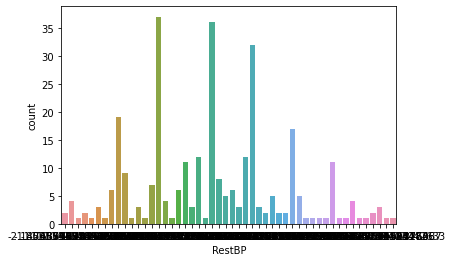

In [186]:
sns.countplot(data['RestBP'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Thal_normal', ylabel='count'>

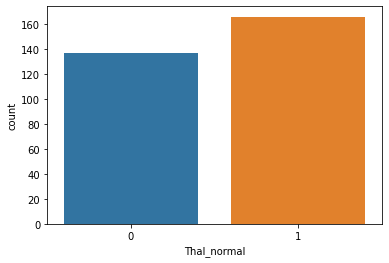

In [187]:
sns.countplot(data['Thal_normal'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AHD_Yes', ylabel='count'>

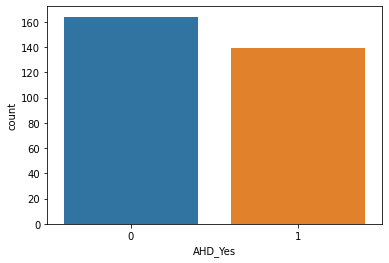

In [188]:
sns.countplot(data['AHD_Yes'])

In [189]:
data.corr()

,Unnamed: 0,Age,RestBP,Chol,MaxHR,Oldpeak,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable,AHD_Yes
Unnamed: 0,1.000000,-0.002367,-0.022028,-0.095518,-0.105488,-0.120384,-0.070849,-0.095155,0.069630,-0.015529,...,-0.166291,-0.000402,0.081888,-0.114841,0.019946,0.055484,-0.013981,0.024866,-0.059675,0.048765
Age,-0.002367,1.000000,0.284946,0.208950,-0.393806,0.203805,-0.097542,-0.051714,-0.151684,0.045438,...,0.138313,0.091661,0.170596,0.028487,0.175941,0.224533,0.160884,-0.129234,0.104902,0.223120
RestBP,-0.022028,0.284946,1.000000,0.130120,-0.045351,0.189171,-0.064456,-0.050127,-0.083234,0.149737,...,0.139000,0.064762,0.021638,0.120930,-0.061240,0.086654,0.078830,-0.136807,0.106210,0.150825
Chol,-0.095518,0.208950,0.130120,1.000000,-0.003432,0.046564,-0.199915,-0.033223,-0.016453,-0.053021,...,0.166100,0.061310,0.043538,-0.047652,0.014457,0.056806,0.096464,0.002944,0.053100,0.085164
MaxHR,-0.105488,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.048663,0.159876,0.249415,0.079683,...,-0.069061,-0.378103,-0.418573,-0.056191,-0.194853,-0.056323,-0.175277,0.293614,-0.214326,-0.417167
Oldpeak,-0.120384,0.203805,0.189171,0.046564,-0.343085,1.000000,0.102173,-0.126339,-0.277513,0.086959,...,0.094202,0.288223,0.310986,0.394253,-0.011613,0.218319,0.189296,-0.339086,0.302145,0.424510
Sex_1,-0.070849,-0.097542,-0.064456,-0.199915,-0.048663,0.102173,1.000000,-0.117189,-0.037990,0.089828,...,0.033676,0.146201,-0.002576,0.047986,0.100103,-0.017836,0.068455,-0.381754,0.326284,0.276816
ChestPain_nonanginal,-0.095155,-0.051714,-0.050127,-0.033223,0.159876,-0.126339,-0.117189,1.000000,-0.279862,-0.180428,...,-0.087962,-0.266871,-0.098902,-0.027681,0.027661,-0.194184,-0.019946,0.204211,-0.168515,-0.315141
ChestPain_nontypical,0.069630,-0.151684,-0.083234,-0.016453,0.249415,-0.277513,-0.037990,-0.279862,1.000000,-0.127412,...,-0.096449,-0.233863,-0.197994,-0.051298,-0.059046,-0.087804,-0.082372,0.207354,-0.188225,-0.248683
ChestPain_typical,-0.015529,0.045438,0.149737,-0.053021,0.079683,0.086959,0.089828,-0.180428,-0.127412,1.000000,...,0.068945,-0.093384,0.009321,0.068981,-0.058710,0.041972,-0.076192,0.009998,-0.022554,-0.088806


<AxesSubplot:>

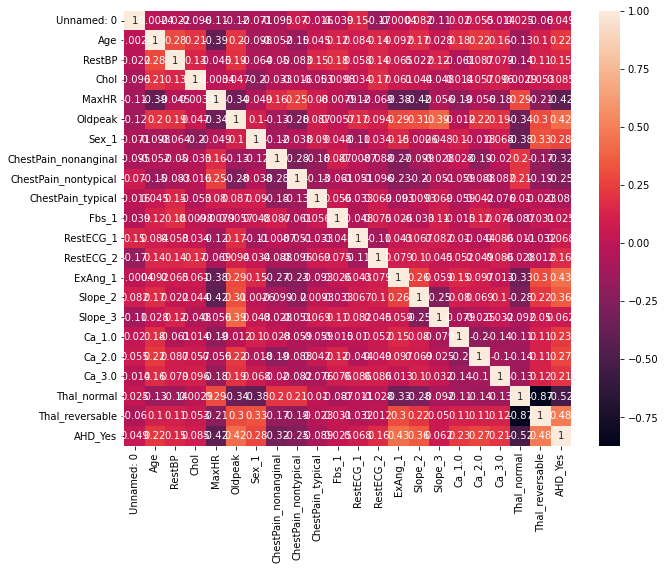

In [190]:
plt.figure(figsize=(10,8))
data.corr()
sns.heatmap(data.corr(),annot=True)

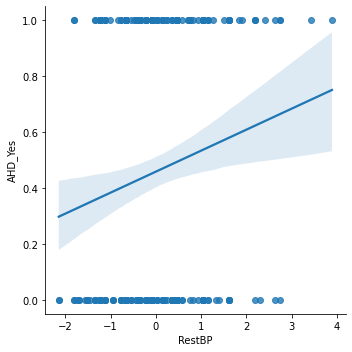

In [191]:
sns.lmplot(x='RestBP',y='AHD_Yes',data =data)

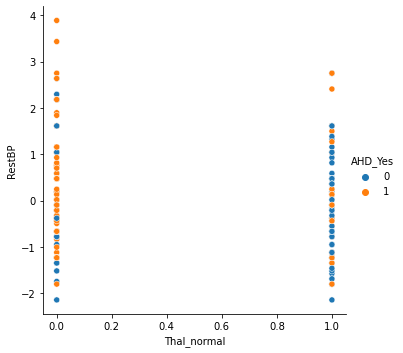

In [192]:
sns.relplot(x='Thal_normal',y='RestBP',hue='AHD_Yes',data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AHD_Yes', ylabel='Density'>

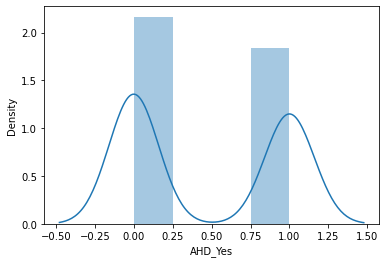

In [193]:
sns.distplot(data['AHD_Yes'])

In [194]:
px.violin(data,y='AHD_Yes',x='RestBP')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:3

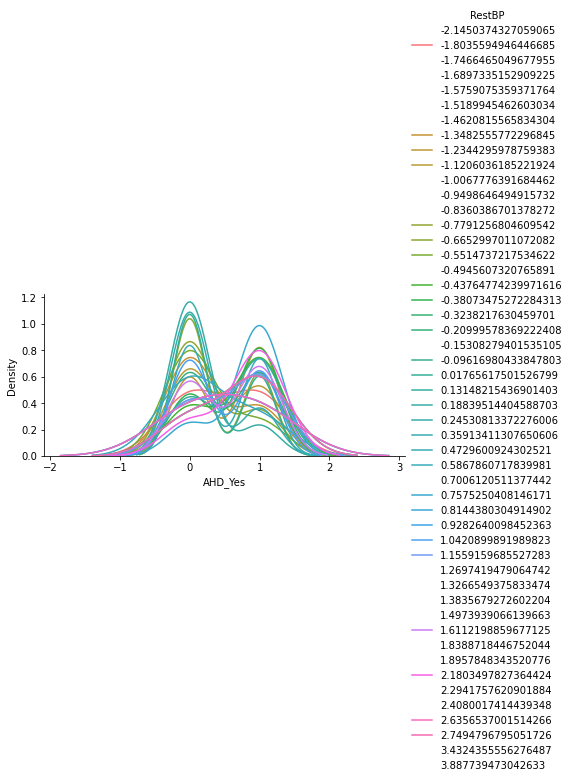

In [195]:
grid=sns.FacetGrid(data,hue='RestBP',aspect=2)
grid.map(sns.kdeplot,'AHD_Yes')
grid.add_legend()

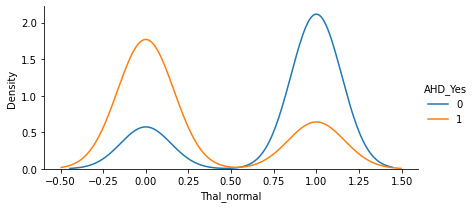

In [196]:
grid=sns.FacetGrid(data,hue='AHD_Yes',aspect=2)
grid.map(sns.kdeplot,'Thal_normal')
grid.add_legend()

<AxesSubplot:>

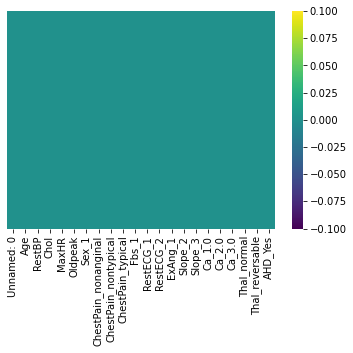

In [197]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

**logistic regression**

In [198]:
data.head()

,Unnamed: 0,Age,RestBP,Chol,MaxHR,Oldpeak,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable,AHD_Yes
0,-1.726344,0.948726,0.757525,-0.264900,0.017197,1.087338,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1,-1.714911,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,0,0,...,1,1,1,0,0,0,1,1,0,1
2,-1.703478,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,0,0,...,1,1,1,0,0,1,0,0,1,1
3,-1.692046,-1.932564,-0.096170,0.063974,1.637359,2.122573,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,-1.680613,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [201]:
X_test, Y_test=get_features_and_target_arrays(data,nume_val,cate_val,st)

In [202]:
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix

In [203]:
test_pred=clf.predict(X_test)

In [204]:
mean_squared_error(Y_test,test_pred)

0.28052805280528054

In [205]:
accuracy_score(Y_test,test_pred)

0.7194719471947195

In [206]:
confusion_matrix(Y_test,test_pred)

array([[128,  35],
       [ 50,  90]])

**Decision Tree**

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
dc_clf= DecisionTreeClassifier()
dc_clf.fit(X_train,Y_train)

dlf_pred=dc_clf.predict(X_test)
print(mean_squared_error(Y_test,dlf_pred))
print(accuracy_score(Y_test,dlf_pred))


0.0
1.0


In [209]:
confusion_matrix(Y_test,dlf_pred)

array([[163,   0],
       [  0, 140]])

**Random Forest**

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
rc_clf= RandomForestClassifier()
rc_clf.fit(X_train,Y_train)

rc_pred = rc_clf.predict(X_test)
print(mean_squared_error(Y_test,rc_pred))
print(accuracy_score(Y_test,rc_pred))


0.0
1.0


In [212]:
confusion_matrix(Y_test,rc_pred)

array([[163,   0],
       [  0, 140]])

**SVM**

In [213]:
from sklearn.svm import SVC

In [214]:
svm_clf= SVC()
svm_clf.fit(X_train,Y_train)

svm_pred = svm_clf.predict(X_test)
print(mean_squared_error(Y_test,svm_pred))
print(accuracy_score(Y_test,svm_pred))

0.16831683168316833
0.8316831683168316


In [215]:
confusion_matrix(Y_test,svm_pred)

array([[138,  25],
       [ 26, 114]])

**Navie Bayes Algorithm**


In [216]:
from sklearn.naive_bayes import GaussianNB

In [217]:
G_NB= GaussianNB()
G_NB.fit(X_train,Y_train)

G_NB_pred = G_NB.predict(X_test)
print(mean_squared_error(Y_test,G_NB_pred))
print(accuracy_score(Y_test,G_NB_pred))

0.2838283828382838
0.7161716171617162


In [218]:
confusion_matrix(Y_test,G_NB_pred)

array([[130,  33],
       [ 53,  87]])

**KNeighborsClassifier**


In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
K_clf=KNeighborsClassifier()
K_clf.fit(X_train,Y_train)

K_clf_pred = K_clf.predict(X_test)
print(mean_squared_error(Y_test,K_clf_pred))
print(accuracy_score(Y_test,K_clf_pred))

0.2079207920792079
0.7920792079207921


In [221]:
confusion_matrix(Y_test,K_clf_pred)

array([[130,  33],
       [ 30, 110]])

In [222]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GNB'],'ACC':[accuracy_score(Y_test,test_pred),accuracy_score(Y_test,svm_pred),accuracy_score(Y_test,K_clf_pred),accuracy_score(Y_test,dlf_pred),accuracy_score(Y_test,rc_pred),accuracy_score(Y_test,G_NB_pred)]})

In [223]:
final_data

,Models,ACC
0,LR,0.719472
1,SVM,0.831683
2,KNN,0.792079
3,DT,1.000000
4,RF,1.000000
5,GNB,0.716172


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Models', ylabel='ACC'>

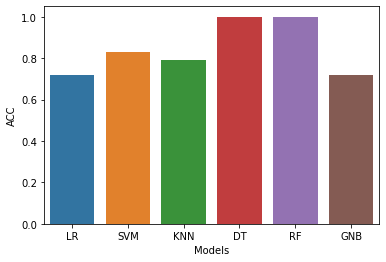

In [224]:
sns.barplot(final_data['Models'],final_data['ACC'])